In [ ]:
#ARIMA FAMILY MODELS 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 

In [7]:
data = pd.read_csv("data6_GDP_Q_real_SA.csv", header = 0 , index_col = 0)
data.index = pd.to_datetime(data.index)
data = data['1970': '2019']
data.columns = ['gdp']
data['gdpgr']=data.gdp.pct_change()*100


In [9]:
data.head(3)

,gdp,gdpgr
DATE,,
1970-01-01,4939.759,NaN
1970-04-01,4946.770,0.141930
1970-07-01,4992.357,0.921551


Text(0.5, 1.0, 'ACF for GDP')

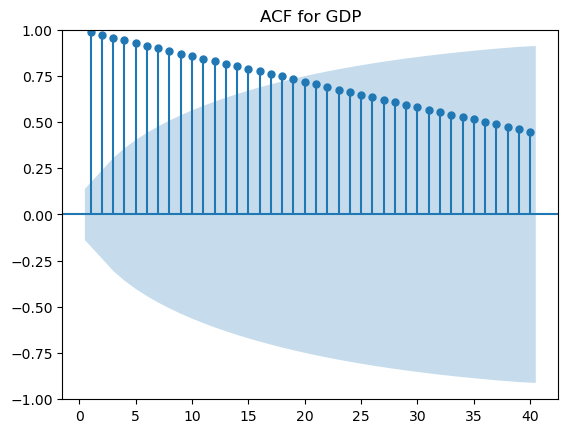

In [23]:
sgt.plot_acf(data.gdp, zero =False,lags =40)
plt.title("ACF for GDP")

Text(0.5, 1.0, 'ACF for GDP')

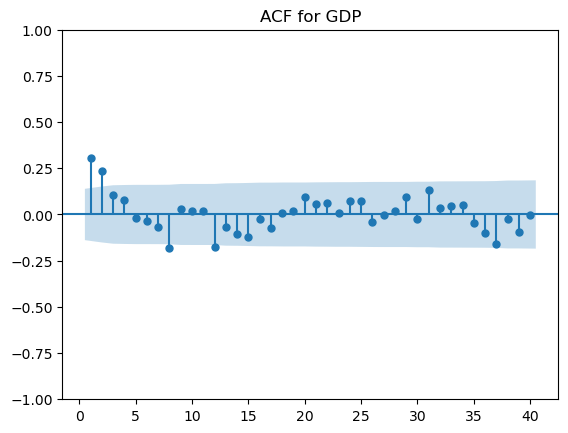

In [25]:
sgt.plot_acf(data.gdpgr [1:], zero =False,lags =40)
plt.title("ACF for GDP")

Text(0.5, 1.0, 'PACF for GDP')

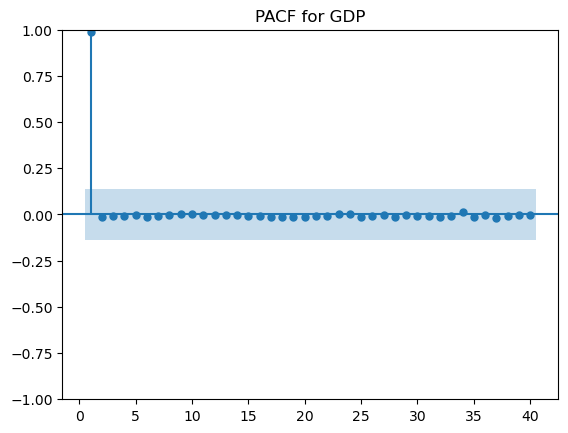

In [27]:
sgt.plot_pacf(data.gdp, zero =False,lags =40)
plt.title("PACF for GDP")

<Axes: xlabel='DATE'>

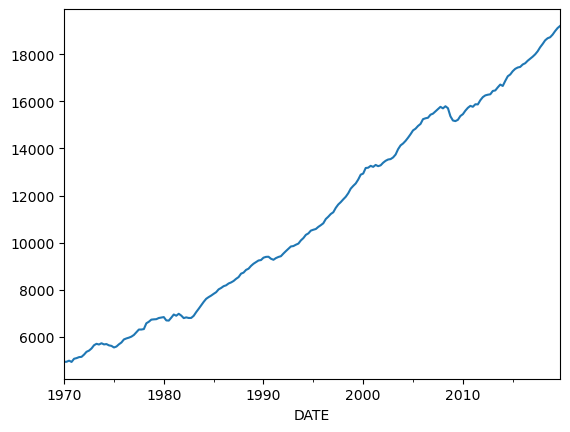

In [29]:
data.gdp.plot()


<Axes: xlabel='DATE'>

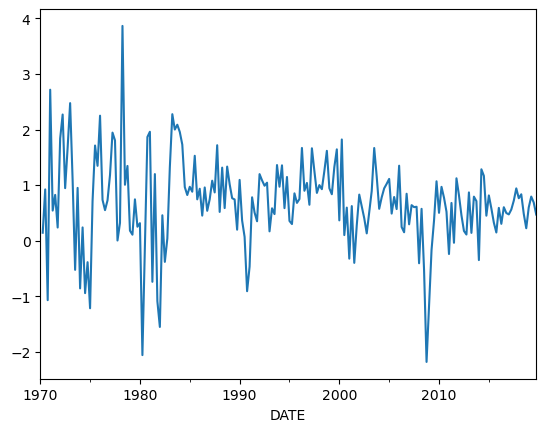

In [31]:
data.gdpgr.plot()


In [33]:
from statsmodels.tsa.arima.model import ARIMA 

In [35]:
gdp_ar1 = ARIMA(data.gdp, order = (1,0,0,))
res_gdp_ar1 = gdp_ar1.fit()
res_gdp_ar1.summary()


C:\Users\wilfo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\wilfo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\wilfo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\wilfo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    gdp   No. Observations:                  200
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1216.900
Date:                Mon, 24 Feb 2025   AIC                           2439.800
Time:                        17:05:10   BIC                           2449.695
Sample:                    01-01-1970   HQIC                          2443.804
                         - 10-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.119e+04   1.41e+04      0.793      0.427   -1.65e+04    3.88e+04
ar.L1          0.9999      0.002    552.362      0.000       0.996       1.003
sigma2      1.082e+04   1249.706      8.661      0.000    8374.286    1.33e+04
===================================================================================
Ljung-Box (L1) (Q):                  28.42   Jarque-Bera (JB):               178.32
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                            -1.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
gdpgr_ar1 = ARIMA(data.gdpgr, order = (1,0,0,))
res_gdpgr_ar1 = gdpgr_ar1.fit()
res_gdpgr_ar1.summary()

C:\Users\wilfo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\wilfo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\wilfo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  gdpgr   No. Observations:                  200
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -225.221
Date:                Mon, 24 Feb 2025   AIC                            456.443
Time:                        17:09:15   BIC                            466.337
Sample:                    01-01-1970   HQIC                           460.447
                         - 10-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6860      0.078      8.809      0.000       0.533       0.839
ar.L1          0.3049      0.058      5.237      0.000       0.191       0.419
sigma2         0.5628      0.036     15.543      0.000       0.492       0.634
===================================================================================
Ljung-Box (L1) (Q):                   0.44   Jarque-Bera (JB):                70.15
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               0.25   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
gdpgr_ar2 = ARIMA(data.gdpgr, order = (2,0,0,))
res_gdpgr_ar2 = gdpgr_ar2.fit()
res_gdpgr_ar2.summary()

C:\Users\wilfo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\wilfo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\wilfo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  gdpgr   No. Observations:                  200
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -222.835
Date:                Mon, 24 Feb 2025   AIC                            453.671
Time:                        17:15:01   BIC                            466.864
Sample:                    01-01-1970   HQIC                           459.010
                         - 10-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6853      0.093      7.377      0.000       0.503       0.867
ar.L1          0.2574      0.060      4.308      0.000       0.140       0.375
ar.L2          0.1535      0.060      2.579      0.010       0.037       0.270
sigma2         0.5493      0.035     15.900      0.000       0.482       0.617
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                88.23
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.25   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""